<a href="https://colab.research.google.com/github/adibhosn/Data_analysis_lab/blob/main/pyspark_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=5d54fa98d91edf77551fd62e14406a1baf86d54accb96fca662635158c2c11da
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
spark = SparkSession.builder.appName("AnaliseSuperMercado").getOrCreate()

In [ ]:
# Configurar o diretório do Kaggle
##kaggle_dir = '/root/.kaggle'
##os.makedirs(kaggle_dir, exist_ok=True)

# Mover o arquivo kaggle.json para o diretório apropriado
##cp kaggle.json {kaggle_dir}/
##!chmod 600 {kaggle_dir}/kaggle.json

In [ ]:
!kaggle datasets download -d mohdshahnawazaadil/supermarket-superstore-dataset-bundle

Dataset URL: https://www.kaggle.com/datasets/mohdshahnawazaadil/supermarket-superstore-dataset-bundle
License(s): Apache 2.0
 99% 195M/198M [00:02<00:00, 103MB/s] 
100% 198M/198M [00:02<00:00, 86.6MB/s]


In [ ]:
!unzip supermarket-superstore-dataset-bundle.zip

Archive:  supermarket-superstore-dataset-bundle.zip
  inflating: aisles.csv              
  inflating: departments.csv         
  inflating: order_products__prior.csv  
  inflating: order_products__train.csv  
  inflating: orders.csv              
  inflating: products.csv            
  inflating: sample_submission.csv   


**Carregamento dos Dados**

In [ ]:
aisles = spark.read.csv("aisles.csv", header=True, inferSchema=True)
departments = spark.read.csv("departments.csv", header=True, inferSchema=True)
order_products_prior = spark.read.csv("order_products__prior.csv", header=True, inferSchema=True)
order_products_train = spark.read.csv("order_products__train.csv", header=True, inferSchema=True)
orders = spark.read.csv("orders.csv", header=True, inferSchema=True)
products = spark.read.csv("products.csv", header=True, inferSchema=True)
sample_submission = spark.read.csv("sample_submission.csv", header=True, inferSchema=True)

In [ ]:
products.show()

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
|         4|Smart Ones Classi...|      38|            1|
|         5|Green Chile Anyti...|       5|           13|
|         6|        Dry Nose Oil|      11|           11|
|         7|Pure Coconut Wate...|      98|            7|
|         8|Cut Russet Potato...|     116|            1|
|         9|Light Strawberry ...|     120|           16|
|        10|Sparkling Orange ...|     115|            7|
|        11|   Peach Mango Juice|      31|            7|
|        12|Chocolate Fudge L...|     119|            1|
|        13|   Saline Nasal Mist|      11|           11|
|        14|Fresh Scent Dishw...|      74|           17|
|        15|Overnight Diapers..

**Contando os valores nulos em cada coluna**

In [ ]:
from pyspark.sql.functions import col, sum as _sum

def count_nulls(df):
    return df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Contar valores nulos em cada tabela
null_counts_aisles = count_nulls(aisles)
null_counts_departments = count_nulls(departments)
null_counts_order_products_prior = count_nulls(order_products_prior)
null_counts_order_products_train = count_nulls(order_products_train)
null_counts_orders = count_nulls(orders)
null_counts_products = count_nulls(products)
null_counts_sample_submission = count_nulls(sample_submission)

null_counts_aisles.show()
null_counts_departments.show()
null_counts_order_products_prior.show()
null_counts_order_products_train.show()
null_counts_orders.show()
null_counts_products.show()
null_counts_sample_submission.show()


+--------+-----+
|aisle_id|aisle|
+--------+-----+
|       0|    0|
+--------+-----+

+-------------+----------+
|department_id|department|
+-------------+----------+
|            0|         0|
+-------------+----------+

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+


**Verificação e Tratamento de Valores Nulos**








In [ ]:
aisles = aisles.na.drop()
departments = departments.na.drop()
order_products_prior = order_products_prior.na.drop()
order_products_train = order_products_train.na.drop()
orders = orders.na.fill({"days_since_prior_order": 0})  # Substituir nulos por 0
products = products.na.drop()
sample_submission = sample_submission.na.drop()

In [ ]:
from pyspark.sql.functions import col, sum as _sum

def count_nulls(df):
    return df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Contar valores nulos em cada tabela
null_counts_aisles = count_nulls(aisles)
null_counts_departments = count_nulls(departments)
null_counts_order_products_prior = count_nulls(order_products_prior)
null_counts_order_products_train = count_nulls(order_products_train)
null_counts_orders = count_nulls(orders)
null_counts_products = count_nulls(products)
null_counts_sample_submission = count_nulls(sample_submission)

null_counts_aisles.show()
null_counts_departments.show()
null_counts_order_products_prior.show()
null_counts_order_products_train.show()
null_counts_orders.show()
null_counts_products.show()
null_counts_sample_submission.show()

+--------+-----+
|aisle_id|aisle|
+--------+-----+
|       0|    0|
+--------+-----+

+-------------+----------+
|department_id|department|
+-------------+----------+
|            0|         0|
+-------------+----------+

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+


In [ ]:
order_products_prior.show()

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       2|     33120|                1|        1|
|       2|     28985|                2|        1|
|       2|      9327|                3|        0|
|       2|     45918|                4|        1|
|       2|     30035|                5|        0|
|       2|     17794|                6|        1|
|       2|     40141|                7|        1|
|       2|      1819|                8|        1|
|       2|     43668|                9|        0|
|       3|     33754|                1|        1|
|       3|     24838|                2|        1|
|       3|     17704|                3|        1|
|       3|     21903|                4|        1|
|       3|     17668|                5|        1|
|       3|     46667|                6|        1|
|       3|     17461|                7|        1|
|       3|     32665|                8|        1|


In [ ]:
products.count()

49688

Verificar se os tipos de dados estão corretos

In [ ]:
from pyspark.sql.functions import col

# Exemplo para a tabela orders
orders = orders.withColumn("order_id", col("order_id").cast("int"))
orders = orders.withColumn("user_id", col("user_id").cast("int"))
orders = orders.withColumn("order_number", col("order_number").cast("int"))
orders = orders.withColumn("order_dow", col("order_dow").cast("int"))
orders = orders.withColumn("order_hour_of_day", col("order_hour_of_day").cast("int"))
orders = orders.withColumn("days_since_prior_order", col("days_since_prior_order").cast("float"))


Unindo Tabelas

In [ ]:
# Juntar products com aisles e departments
products = products.join(aisles, on="aisle_id").join(departments, on="department_id")

# Juntar order_products_prior com products
order_products_prior = order_products_prior.join(products, on="product_id")

# Juntar order_products_train com products
order_products_train = order_products_train.join(products, on="product_id")

# Juntar orders com order_products_prior e order_products_train
orders_prior = orders.join(order_products_prior, on="order_id")
orders_train = orders.join(order_products_train, on="order_id")


**Análise e Criação dos Dashboards**





Tabela de Distribuição de Frequências

Exemplo de tabela de distribuição de frequências dos produtos mais vendidos:




In [ ]:
frequency_table = orders_prior.groupBy("product_name").count().orderBy("count", ascending=False)
frequency_table.show()


+--------------------+------+
|        product_name| count|
+--------------------+------+
|              Banana|472565|
|Bag of Organic Ba...|379450|
|Organic Strawberries|264683|
|Organic Baby Spinach|241921|
|Organic Hass Avocado|213584|
|     Organic Avocado|176815|
|         Large Lemon|152657|
|        Strawberries|142951|
|               Limes|140627|
|  Organic Whole Milk|137905|
| Organic Raspberries|137057|
|Organic Yellow Onion|113426|
|      Organic Garlic|109778|
|    Organic Zucchini|104823|
| Organic Blueberries|100060|
|      Cucumber Kirby| 97315|
|  Organic Fuji Apple| 89632|
|       Organic Lemon| 87746|
|Apple Honeycrisp ...| 85020|
|Organic Grape Tom...| 84255|
+--------------------+------+
only showing top 20 rows



Tabela 1:

 Ao se analisar cuidadosamente a tabela contendo os itens com maior quantidade de vendas, é possível perceber que a grande maioria dos produtos dentre os 20 mais populares se tratam de frutas, como banana, sacola com bananas, morango, limão etc.
 Portanto, é essencial garantir que esses itens estão sendo repostos de forma a evitar a indisponibilidade deles para o consumidor.

 Além disso, uma importante tomada de decisão é ajustar a arquitetura/layout do supermercado de forma a facilitar o cliente a encontrar os produtos mais vendidos, fazendo uma análise desde o momento que o cliente entra no estabelecimento. Assim, os produtos mais requisitados vão ser de mais fácil acesso, aumentando o número de vendas e preferência pelo supermercado em questão, enquanto os produtos menos requisitados podem ficar um pouco mais escondidos sem afetar as vendas de forma significativa.

 Resumindo, duas importantes ações a serem feitas a partir dos dados da tabela um é: aumentar os esforços de reposição dos itens em questão e ajustar o layout do supermercado para favorecer a venda dos produtos mais requisitados e melhorar a experiência do cliente.


#Diagrama de Pareto

As barras representam a contagem de vendas de cada produto.

A linha mostra a percentagem acumulada das vendas.

Este gráfico ajuda a identificar os produtos que contribuem mais para as vendas totais, seguindo o princípio de Pareto (80/20), onde aproximadamente 80% dos efeitos vêm de 20% das causas.

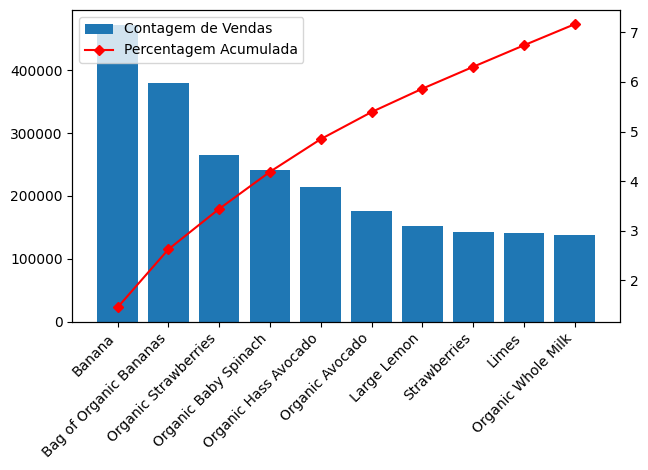

In [ ]:
from pyspark.sql.functions import sum as _sum

total_sales = frequency_table.agg(_sum("count")).collect()[0][0]
frequency_table = frequency_table.withColumn("cumulative_percentage", col("count") / total_sales * 100)

frequency_table = frequency_table.orderBy(col("count").desc())

# Convert to Pandas for visualization
pandas_df = frequency_table.toPandas()
pandas_df['cumulative_percentage'] = pandas_df['cumulative_percentage'].cumsum()

# Plot Pareto Chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bar_plot = ax.bar(pandas_df['product_name'][:10], pandas_df['count'][:10])

# Rotação e ajuste do espaçamento dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

ax2 = ax.twinx()
line_plot = ax2.plot(pandas_df['product_name'][:10], pandas_df['cumulative_percentage'][:10], color='r', marker='D', ms=5)

# Adiciona legenda personalizada para os rótulos do eixo x
plt.legend([bar_plot, line_plot[0]], ['Contagem de Vendas', 'Percentagem Acumulada'], loc='upper left')

plt.show()


Com base na análise do gráfico de Pareto, a tomada de decisão deve focar em aumentar o estoque de bananas, ajustar seu preço para maximizar a competitividade e as margens de lucro, e investir em campanhas de marketing direcionadas para promover as bananas devido à sua alta demanda. Simultaneamente, é essencial diversificar as estratégias de marketing para incluir outros produtos populares como "Bag of Organic Bananas" e "Organic Strawberries", manter a qualidade dos produtos, ajustar as operações conforme as tendências sazonais e utilizar feedback dos clientes para otimizar continuamente as ofertas, implementando também estratégias de cross-selling para aumentar o ticket médio e a satisfação do cliente.

c. Gráfico de Pontos ou Dispersão

Visualizar a relação entre o número de produtos no carrinho e a frequência de reordenamento:

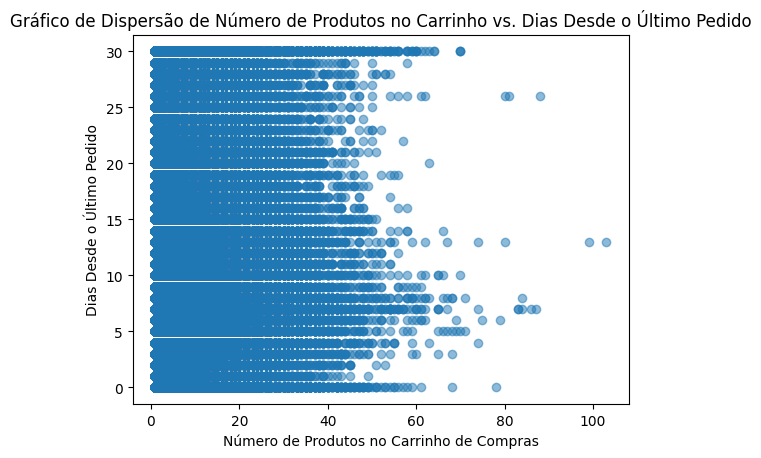

In [ ]:
from pyspark.sql.functions import col

# Amostragem aleatória do DataFrame orders_prior e unindo com a tabela orders para obter days_since_prior_order
sampled_orders_prior = orders_prior.sample(fraction=0.1, withReplacement=False)
sampled_orders = orders.sample(fraction=0.1, withReplacement=False)

# Renomear a coluna days_since_prior_order no DataFrame orders para evitar ambiguidade
sampled_orders = sampled_orders.withColumnRenamed("days_since_prior_order", "days_since_prior_order_orders")

# Juntar os DataFrames sampled_orders_prior e sampled_orders
sampled_orders_joined = sampled_orders_prior.join(sampled_orders, on="order_id", how="inner")

# Selecionar as colunas necessárias
selected_columns = sampled_orders_joined.select("add_to_cart_order", "days_since_prior_order_orders")

# Converter o DataFrame amostrado para pandas
pandas_df = selected_columns.toPandas()

# Plotar o gráfico de dispersão
plt.scatter(pandas_df["add_to_cart_order"], pandas_df["days_since_prior_order_orders"], alpha=0.5)

# Adicionar legendas e título
plt.xlabel("Número de Produtos no Carrinho de Compras")
plt.ylabel("Dias Desde o Último Pedido")
plt.title("Gráfico de Dispersão de Número de Produtos no Carrinho vs. Dias Desde o Último Pedido")

plt.show()


No gráfico de Dispersão gerado anteriormente, nota-se que a média de produtos no carrinho de compras é semelhante independente do intervalo de dias em que o cliente efetuou sua última compra. Duas exceções pequenas estão para os clientes que fazem compras diariamente e aqueles que fazem mensalmente. Nesses casos, a quantidade é um pouco maior que a média geral, possuindo também uma quantidade maior de outliers para aqueles que fazem compras uma vez por mês.

Em média, os clientes compram cerca de 50 produtos de uma vez. Por isso, é importante buscar deixar os caixas preparados durante todos os dias, preparando a quantidade de caixas e atendentes treinados de forma a atender a demanda da forma mais adequada, deixando apenas uma pequena quantidade de 'caixas rápidos', destinados a atender aqueles que querem comprar poucos produtos e não desejam gastar muito tempo para isso. Além disso, deve-se garantir que a maioria dos carrinhos de compra consigam acomodar até 40-50 produtos de médio porte, não se esquecendo de destinar cerca de 5% ou 10% dos carrinhos para os clientes que fazem compras maiores, sendo esses capazes de acomodar cerca de 80 produtos de médio porte. Assim, o cliente consegue obter tudo que precisa apenas com um carrinho e uma cesta, facilitando sua locomoção e sendo mais prático.

d. Histograma

Histograma da distribuição dos dias desde o último pedido:

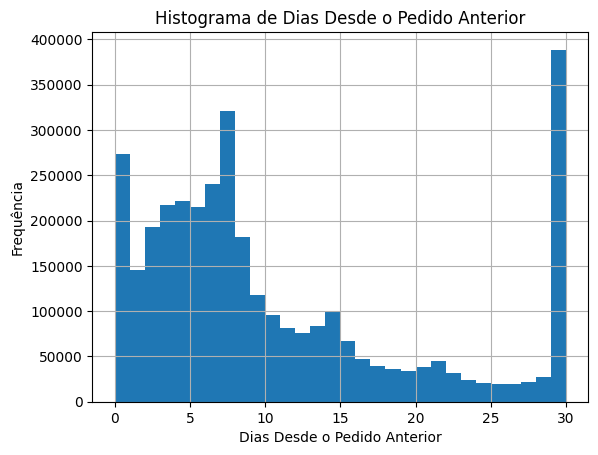

In [ ]:
# Converter os dados do DataFrame para pandas
histogram_data_pd = orders.select("days_since_prior_order").toPandas()

# Plotar o histograma
histogram_data_pd["days_since_prior_order"].hist(bins=30)

# Adicionar rótulos e título
plt.xlabel("Dias Desde o Pedido Anterior")
plt.ylabel("Frequência")
plt.title("Histograma de Dias Desde o Pedido Anterior")

plt.show()


No histograma, é possível ver que a maioria dos clientes fazem compras em intervalos de tempo de um mês ou de aproximadamente uma semana. Portanto precisa-se buscar meios de aumentar a satisfação desses clientes, de modo a fidelizá-los. Uma maneira de fazer isso é através de promoções e outros incentivos.

Para os clientes que vão em média a cada 5-8 dias deve-se incentivar o consumo de produtos perecíveis, a exemplo de frutas como banana e morango, além de itens como detergente e semelhantes. Isso deve ser feito através de promoções e programas de sócios que dão descontos, direito a produtos de graça a cada quantidade x em compras e outros benefícios.

Já para aqueles que vão em média uma vez por mês, deve-se fazer a mesma coisa, mas com descontos para itens que costumam durar um pouco mais. Um exemplo de ação que pode ser feito é selecionar um dia, geralmente o com menos quantidade de vendas, para ter descontos em produtos de maior duração. Dessa forma, aumenta-se a quantidade de vendas em dias menos movimentados.

Tudo isso deve ser divulgado dentro do próprio supermercado, por meio de elementos visuais e comunicação com os funcionários, principalmente caixas e atendentes, além de propagandas na TV e em outros meios de comunicação. Assim, os clientes ficarão cientes desses benefícios e poderão fazer usufruto deles, servindo de estímulo para comprarem no estabelecimento em questão e fidelizando uma grande quantidade de pessoas.

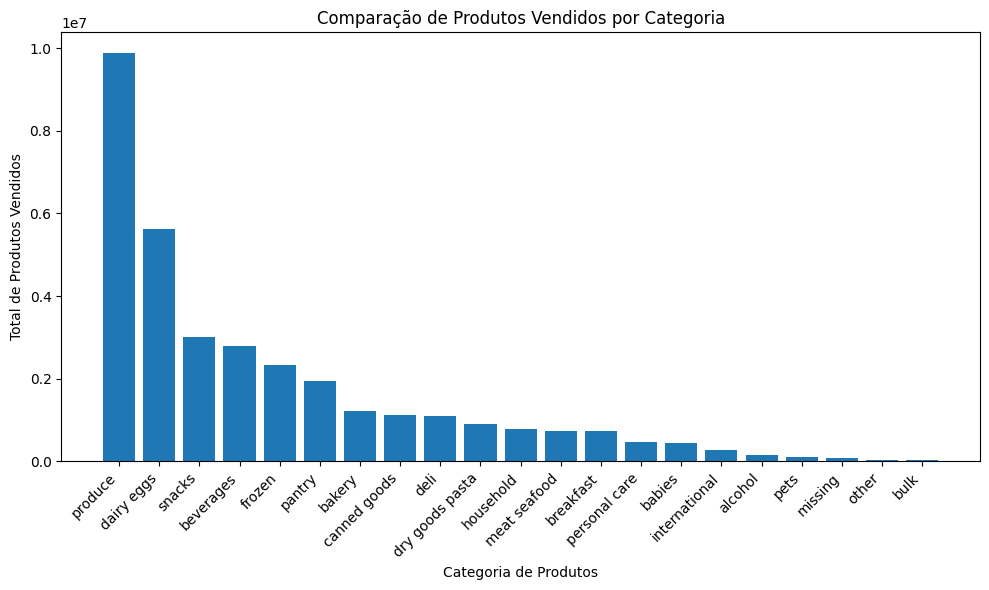

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count


# Criar uma sessão Spark
spark = SparkSession.builder.master("local").appName("AnaliseSupermercado").getOrCreate()

order_products = order_products_prior.union(order_products_train)

# Agrupar por categoria e contar o número de produtos vendidos
category_sales = order_products.groupBy("department_id").agg(count("product_id").alias("total_vendas"))

# Carregar a tabela de departamentos

# Unir com a tabela de departamentos para obter o nome das categorias
category_sales = category_sales.join(departments, on="department_id", how="inner")


# Converter para Pandas para visualização
category_sales_pd = category_sales.select("department", "total_vendas").orderBy("total_vendas", ascending=False).toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(category_sales_pd['department'], category_sales_pd['total_vendas'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Categoria de Produtos")
plt.ylabel("Total de Produtos Vendidos")
plt.title("Comparação de Produtos Vendidos por Categoria")
plt.tight_layout()

# Exibir o gráfico
plt.show()


Nesse grafico, percebe-se que a categoria de produto mais vendido no supermercado é a de frutas e vegetais, onde possui uma grande porcentagem de vendas. Uma das ideias é incentivar as vendas desses produtos alimenticios, através de marketing sobre alimentação. Os produtos menos vendidos são deixados de lado por não trazerem lucro siignificativo.
